In [2]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import network_layers
import tensorflow as tf

In [3]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

## Import test datasets

### Breast cancer dataset

In [4]:
train_pairs_breast, val_pairs_breast, test_pairs_breast = utils.split_dataset(utils.create_list())

In [4]:
batch_size = 8

In [7]:
test_dataset_breast = utils.create_dataset(test_pairs_breast)
test_dataset_breast = test_dataset_breast.batch(batch_size)

### Skin cancer dataset

In [8]:
test_dataset_skin =utils. create_dataset(utils.create_list_skin("Datasets/ISIC-2017_Test_v2_Data", "Datasets/ISIC-2017_Test_v2_Part1_GroundTruth"))

In [9]:
test_dataset_skin = test_dataset_skin.batch(batch_size)

### Brain cancer dataset

In [5]:
train_pairs_brain, val_pairs_brain, test_pairs_brain = utils.split_dataset(utils.create_list_brain())

In [7]:
test_dataset_brain = utils.create_dataset(test_pairs_brain)
test_dataset_brain = test_dataset_brain.batch(batch_size)

## Upload models

In [9]:
custom_objects = {"tversky_loss": utils.tversky_loss, "dice_coefficient": utils.dice_coefficient, "iou": utils.iou, "ChannelTransformer": network_layers.ChannelTransformer, "CCA": network_layers.CCA}

In [13]:
unet_breast = tf.keras.models.load_model("Best_models/best_basic_unet_breast.h5", custom_objects=custom_objects)
att_unet_breast = tf.keras.models.load_model("Best_models/best_attention_unet_breast.h5", custom_objects=custom_objects)
uctransnet_breast = tf.keras.models.load_model("Best_models/best_uctransnet_breast.h5", custom_objects=custom_objects)

In [14]:
unet_skin = tf.keras.models.load_model("Best_models/best_basic_unet_skin.h5", custom_objects=custom_objects)
att_unet_skin = tf.keras.models.load_model("Best_models/best_attention_unet_skin.h5", custom_objects=custom_objects)
uctransnet_skin = tf.keras.models.load_model("Best_models/best_uctransnet_skin.h5", custom_objects=custom_objects)

In [10]:
unet_brain = tf.keras.models.load_model("Best_models/best_basic_unet_brain.h5", custom_objects=custom_objects)
att_unet_brain = tf.keras.models.load_model("Best_models/best_attention_unet_brain.h5", custom_objects=custom_objects)
uctransnet_brain = tf.keras.models.load_model("Best_models/best_uctransnet_brain.h5", custom_objects=custom_objects)

## Evaluate

In [16]:
def evaluate(models, dataset):
    for model in models:
        print(f"Evaluating {model[0]}")
        model[1].evaluate(dataset)

In [11]:
def display_masks(models, dataset):
    for i, (image, mask) in enumerate(dataset.take(1)):
        predicted_masks = [model[1].predict(image, verbose = 0) for model in models]

        for j in range(image.shape[0]):
            plt.figure(figsize=(20, 4))

            #display the input image
            plt.subplot(1, 5, 1)
            plt.imshow(image[j])
            plt.title("Image", fontsize=30)
            plt.axis('off')

            #display the actual mask
            plt.subplot(1, 5, 2)
            plt.imshow(mask[j], cmap='gray')
            plt.title("Ground Truth", fontsize=30)
            plt.axis('off')

            for idx, (model_name, _) in enumerate(models):
                plt.subplot(1, 5, idx + 3)
                plt.imshow(predicted_masks[idx][j], cmap='gray')
                plt.title(model_name, fontsize=30)
                plt.axis('off')

            plt.tight_layout()
            plt.show()

### Breast cancer dataset

In [18]:
breast_models = [("U-Net", unet_breast), ("Att U-Net", att_unet_breast), ("UC-TransNet", uctransnet_breast)]

In [19]:
evaluate(breast_models, test_dataset_breast)

Evaluating U-Net


2025-02-16 09:38:09.040000: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


17/17 [==============================] - 6s 116ms/step - loss: 0.4048 - dice_coefficient: 0.5930 - iou: 0.4361 - accuracy: 0.9267 - precision_metric: 0.5893 - recall_metric: 0.6077
Evaluating Att U-Net
17/17 [==============================] - 2s 60ms/step - loss: 0.4010 - dice_coefficient: 0.6126 - iou: 0.4592 - accuracy: 0.9351 - precision_metric: 0.6525 - recall_metric: 0.5932
Evaluating UC-TransNet
17/17 [==============================] - 2s 44ms/step - loss: 0.3866 - dice_coefficient: 0.5798 - iou: 0.4226 - accuracy: 0.9148 - precision_metric: 0.5194 - recall_metric: 0.6818


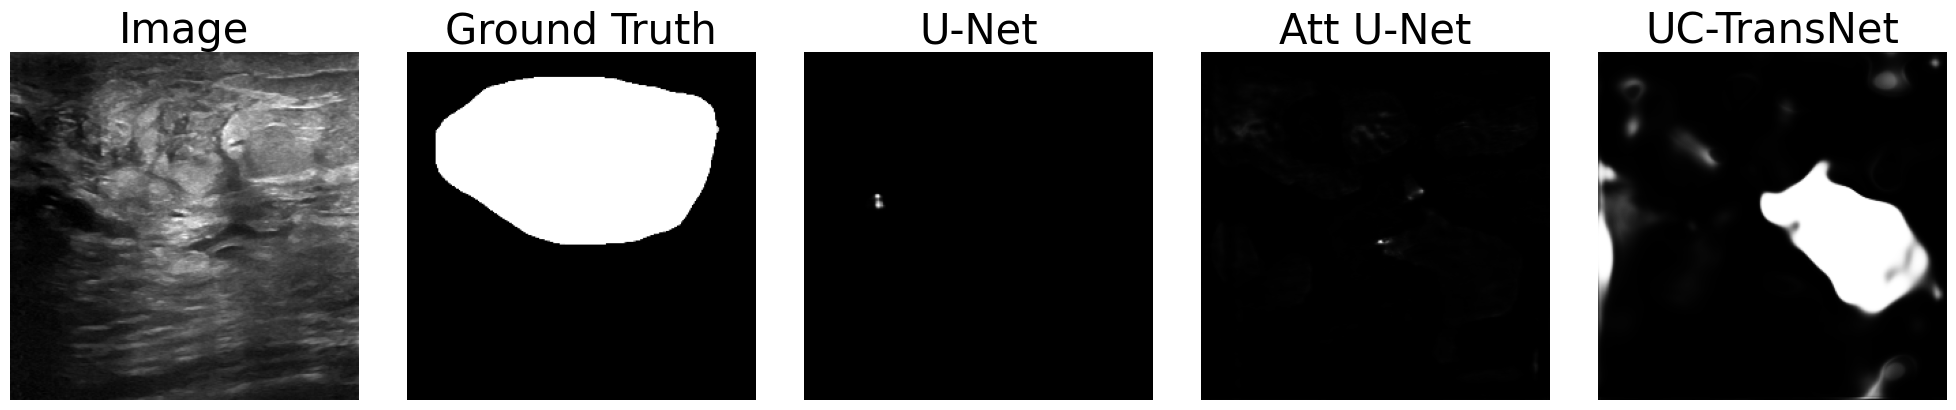

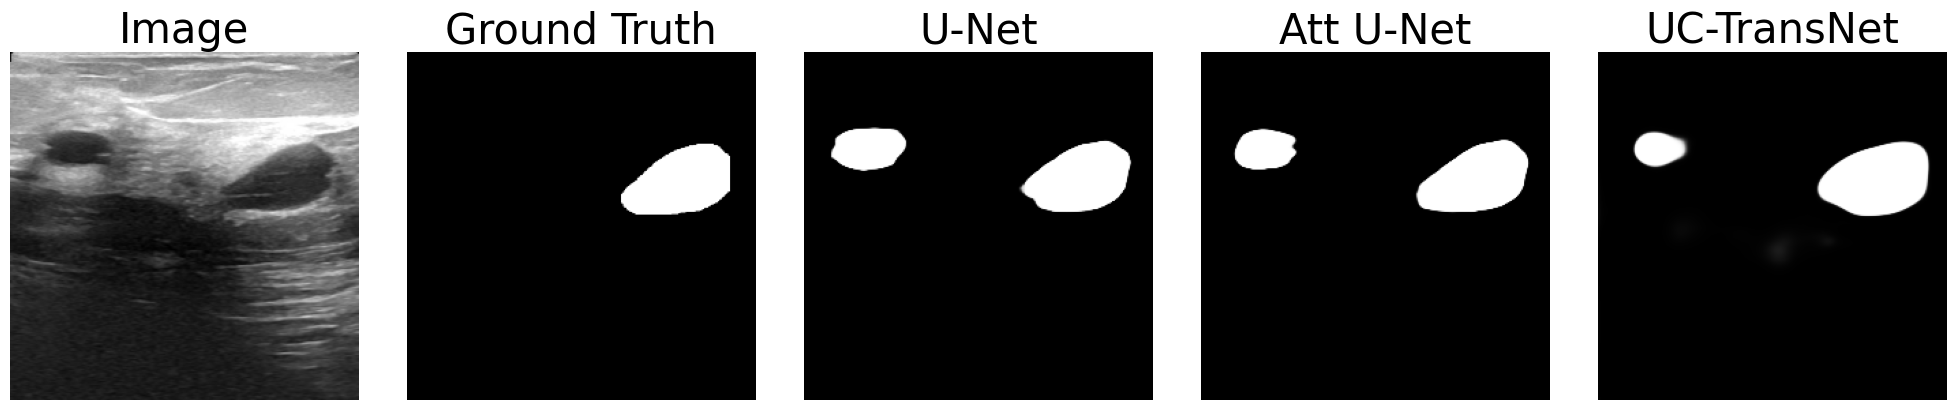

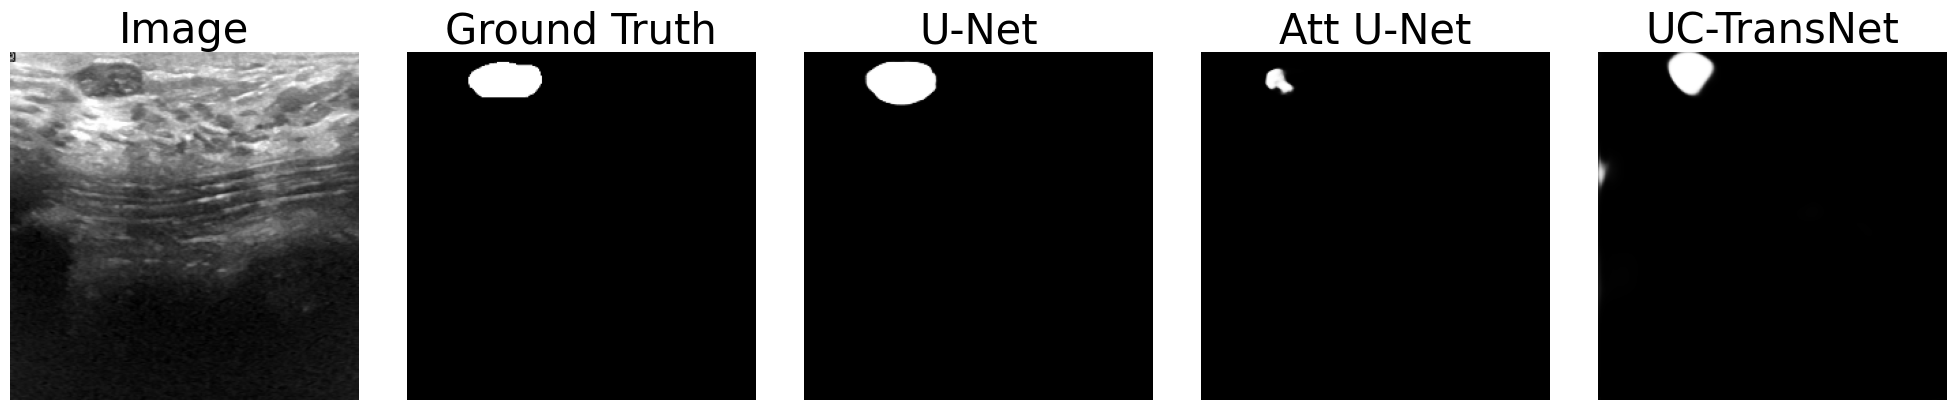

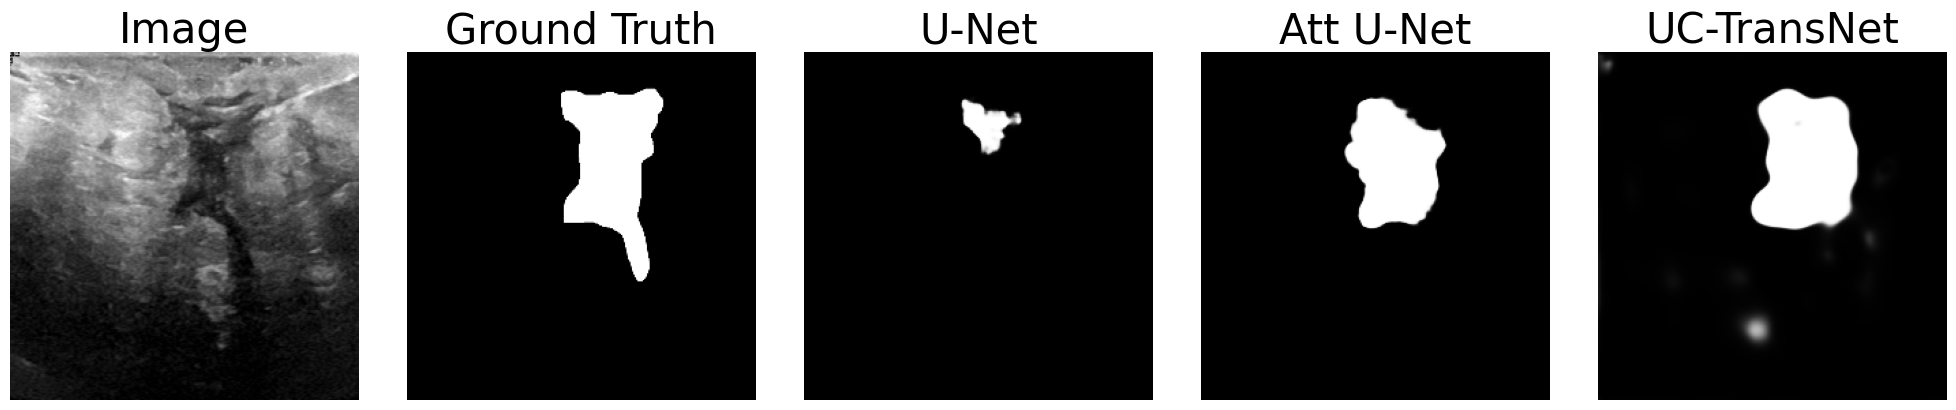

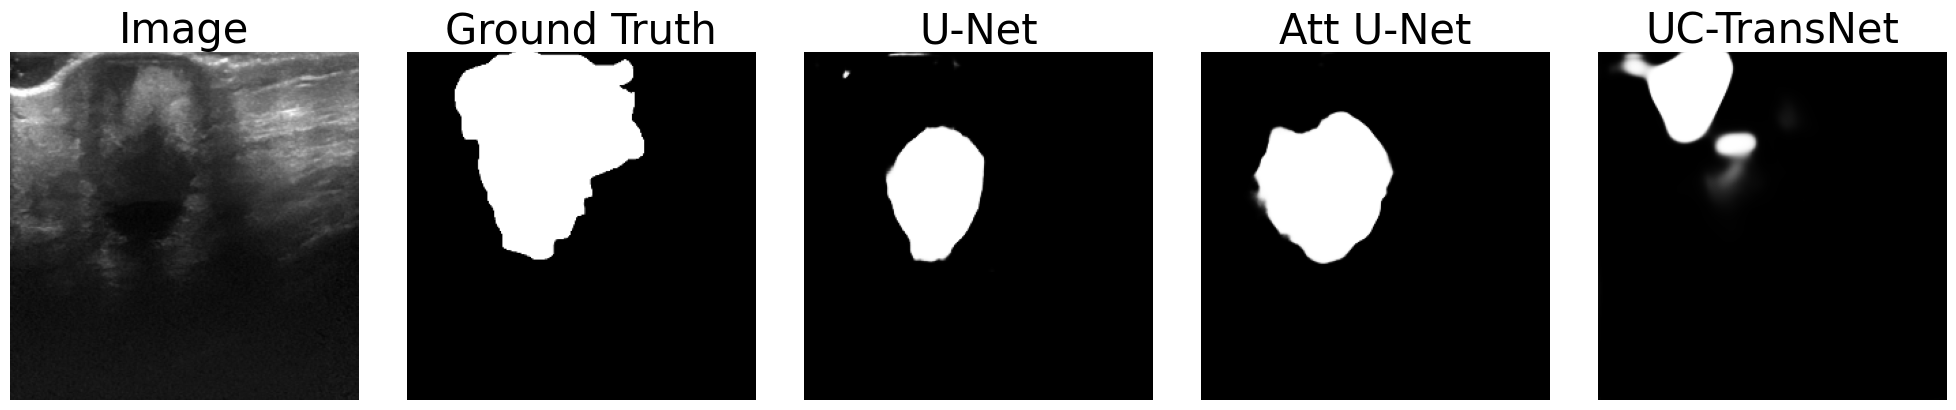

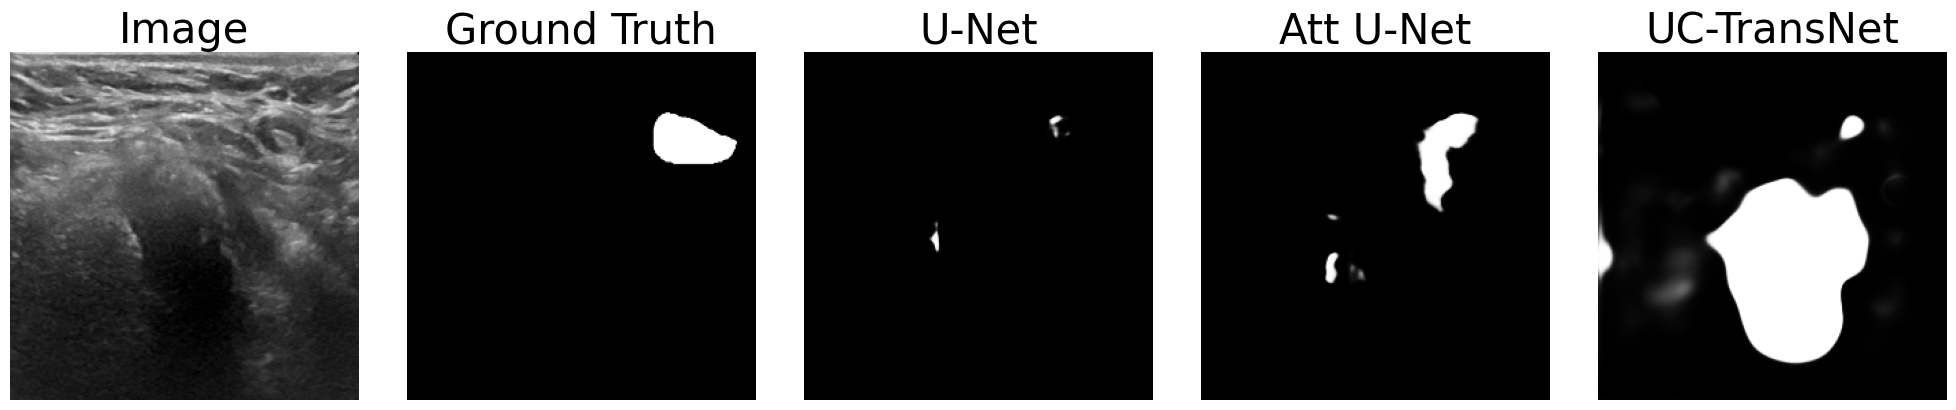

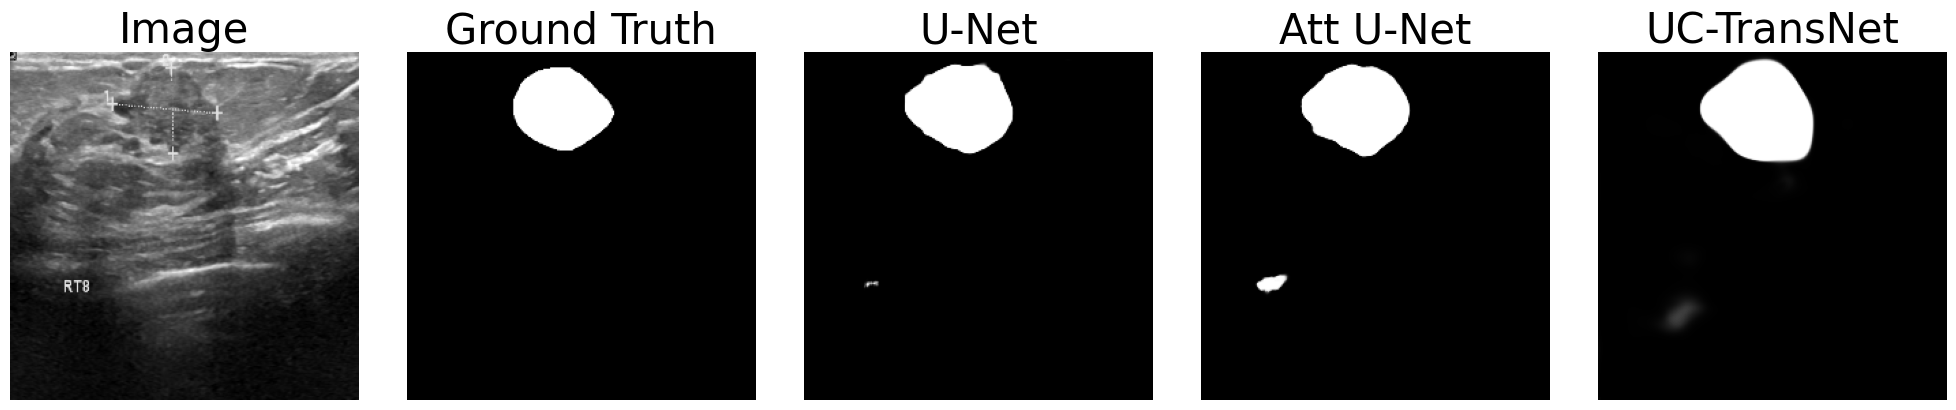

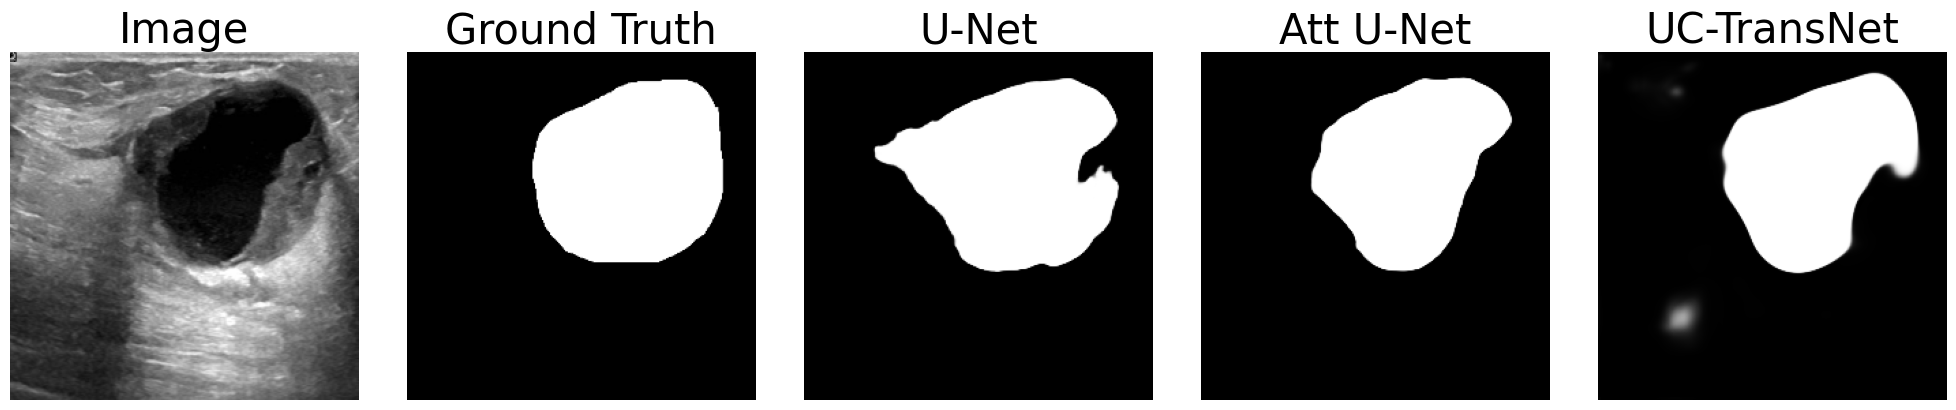

In [20]:
display_masks(breast_models, test_dataset_breast)

### Skin cancer dataset

In [21]:
skin_models = [("U-Net", unet_skin), ("Att U-Net", att_unet_skin), ("UC-TransNet", uctransnet_skin)]

In [22]:
evaluate(skin_models, test_dataset_skin)

Evaluating U-Net
75/75 [==============================] - 35s 450ms/step - loss: 0.1964 - dice_coefficient: 0.8083 - iou: 0.6910 - accuracy: 0.9227 - precision_metric: 0.8596 - recall_metric: 0.8094
Evaluating Att U-Net
75/75 [==============================] - 29s 370ms/step - loss: 0.2294 - dice_coefficient: 0.7983 - iou: 0.6769 - accuracy: 0.9211 - precision_metric: 0.9115 - recall_metric: 0.7417
Evaluating UC-TransNet
75/75 [==============================] - 26s 339ms/step - loss: 0.2352 - dice_coefficient: 0.7906 - iou: 0.6682 - accuracy: 0.9175 - precision_metric: 0.9008 - recall_metric: 0.7348


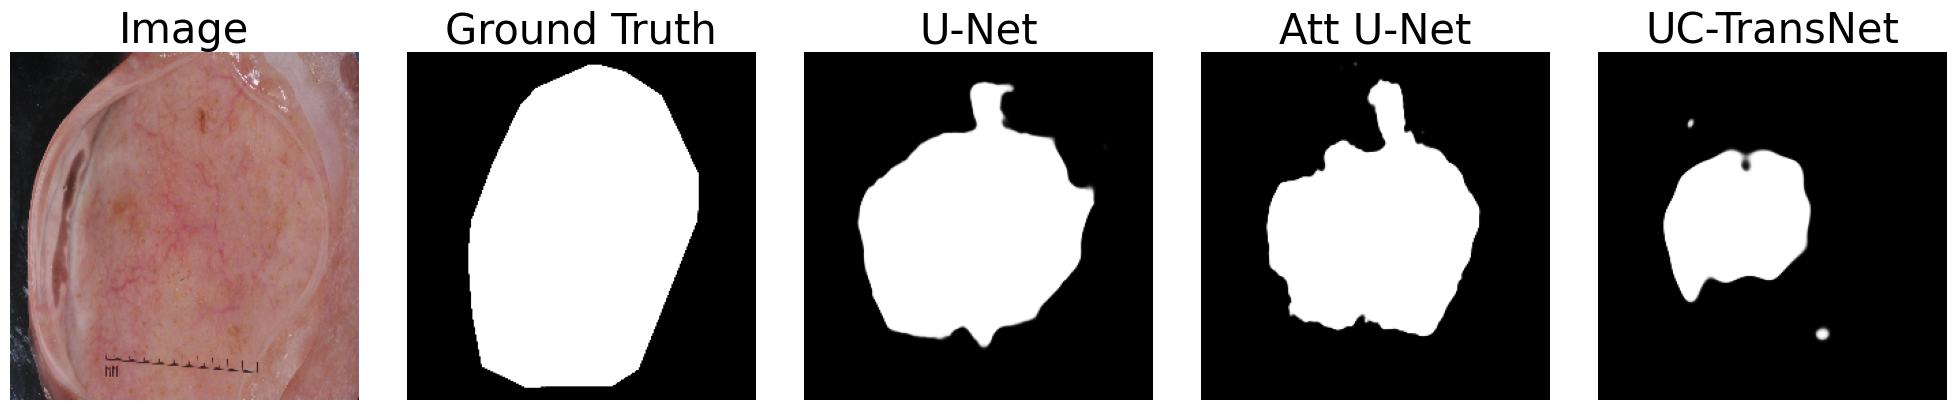

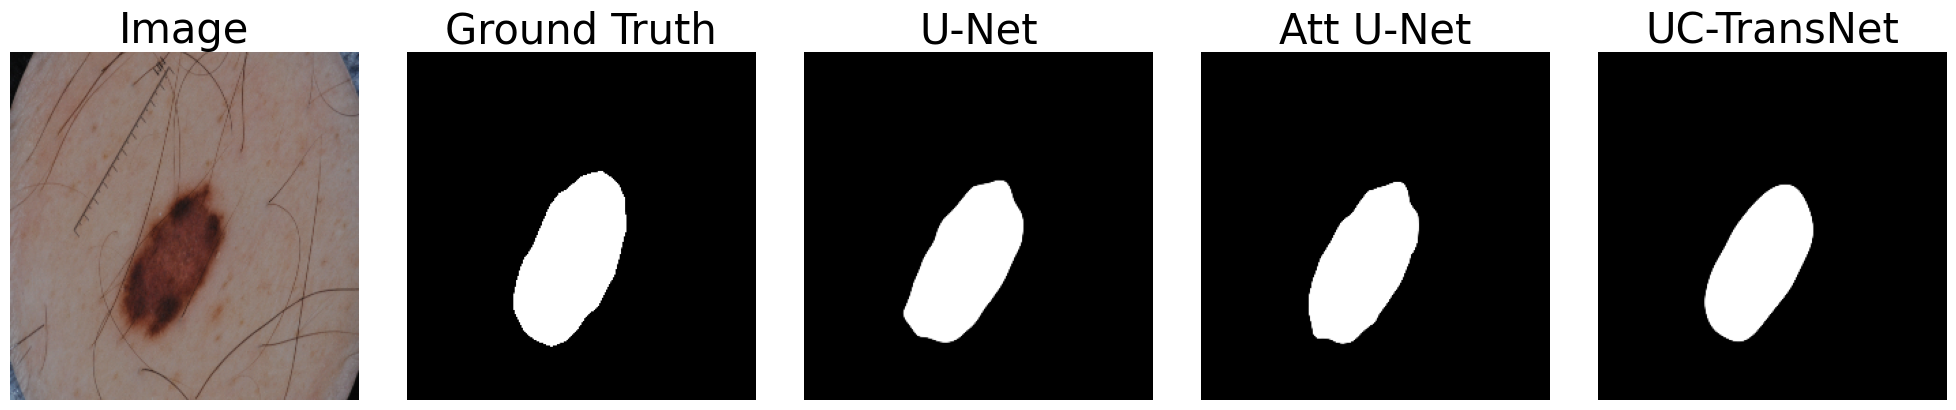

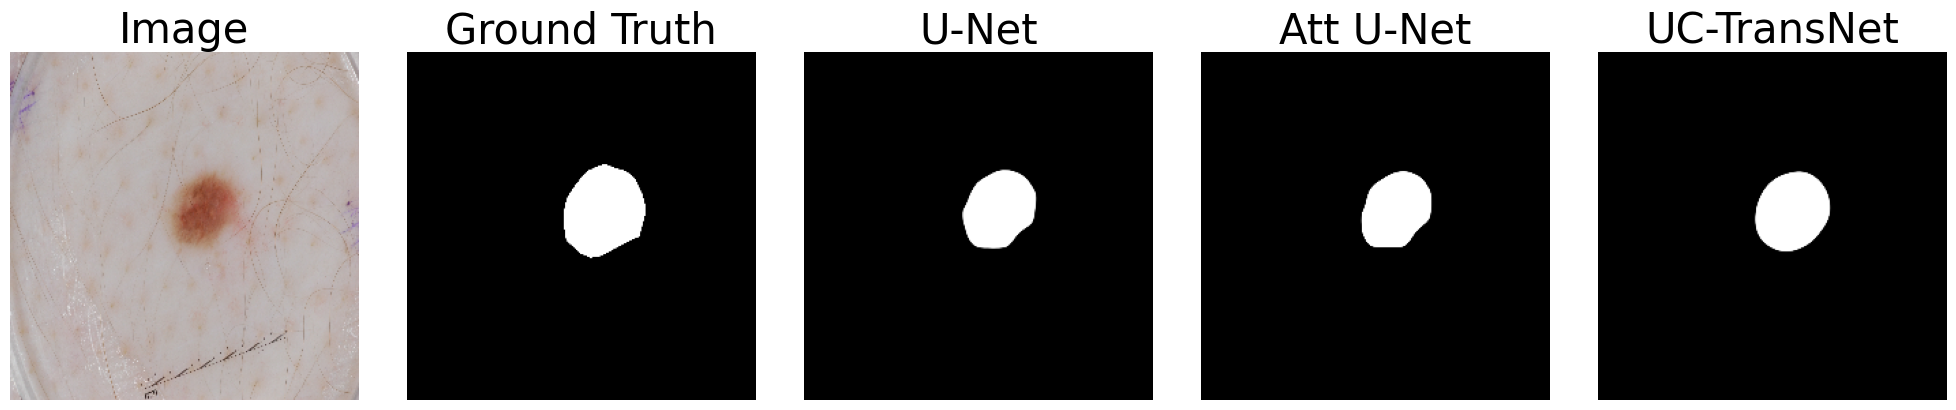

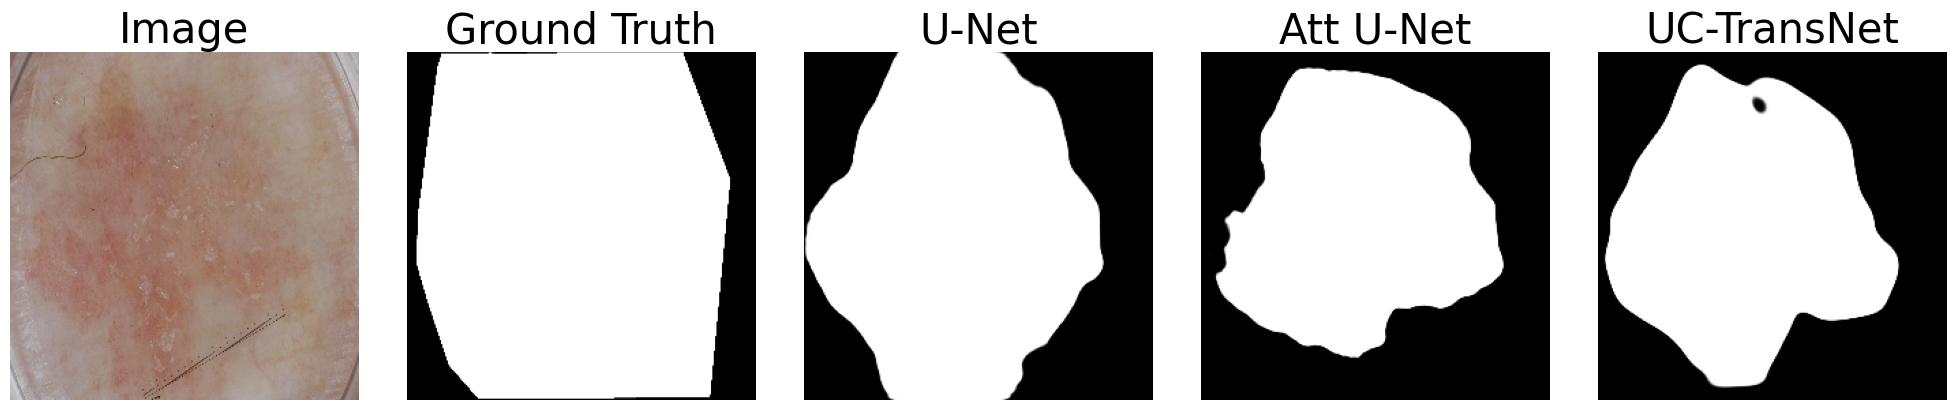

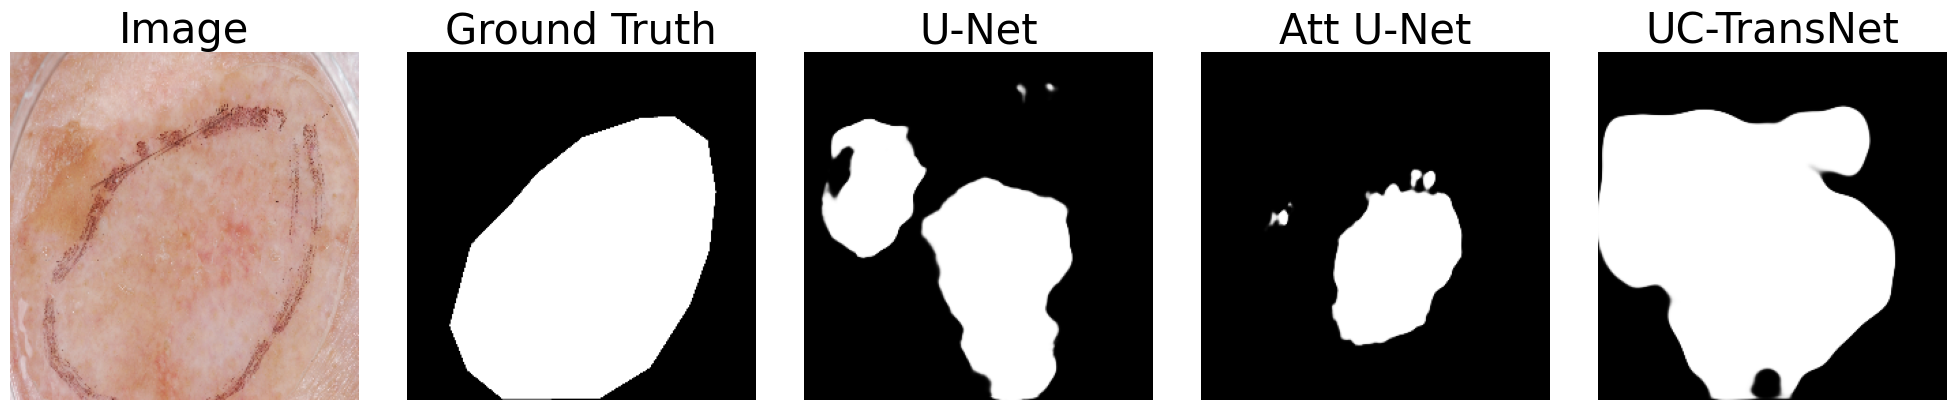

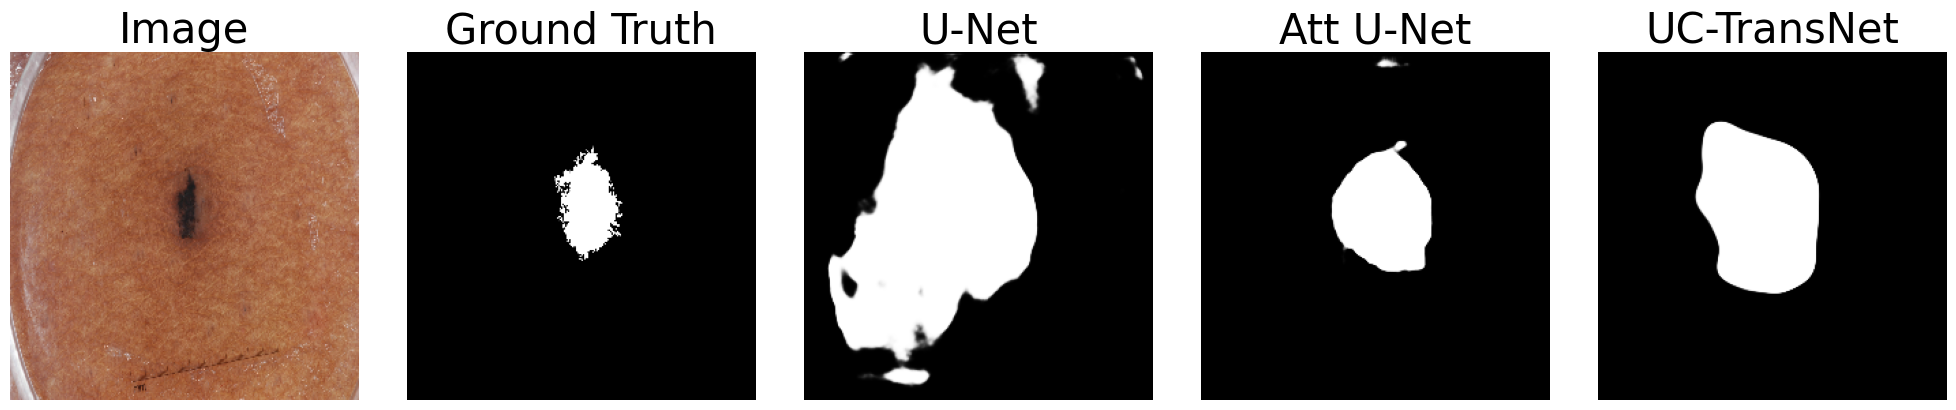

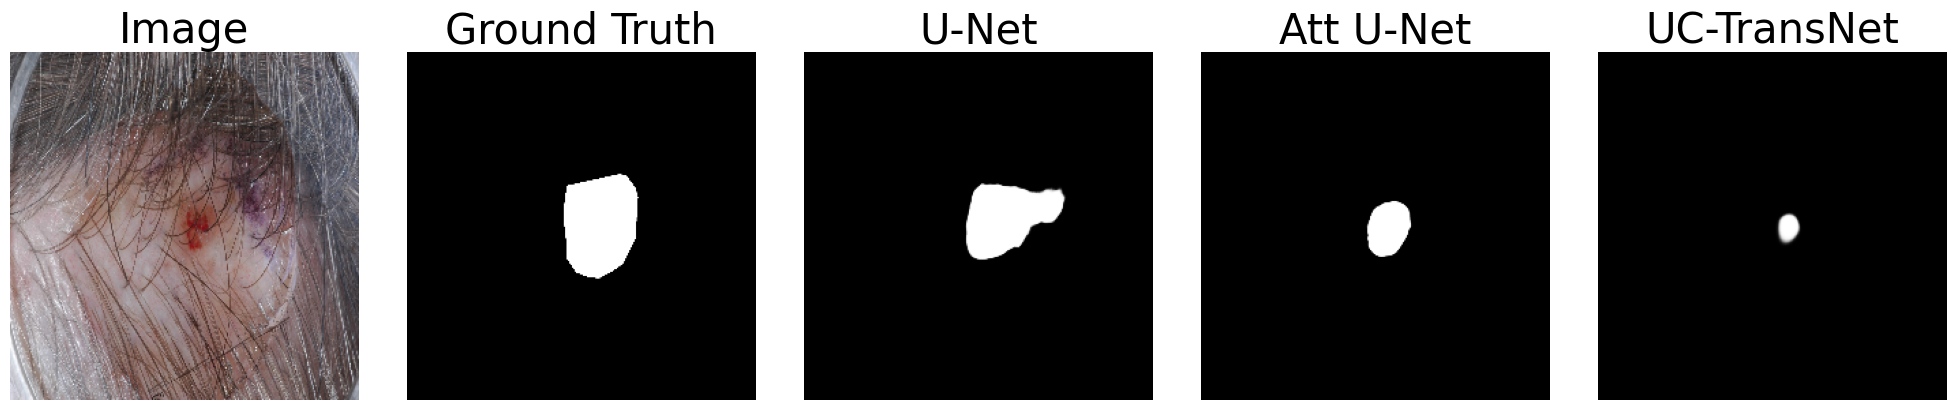

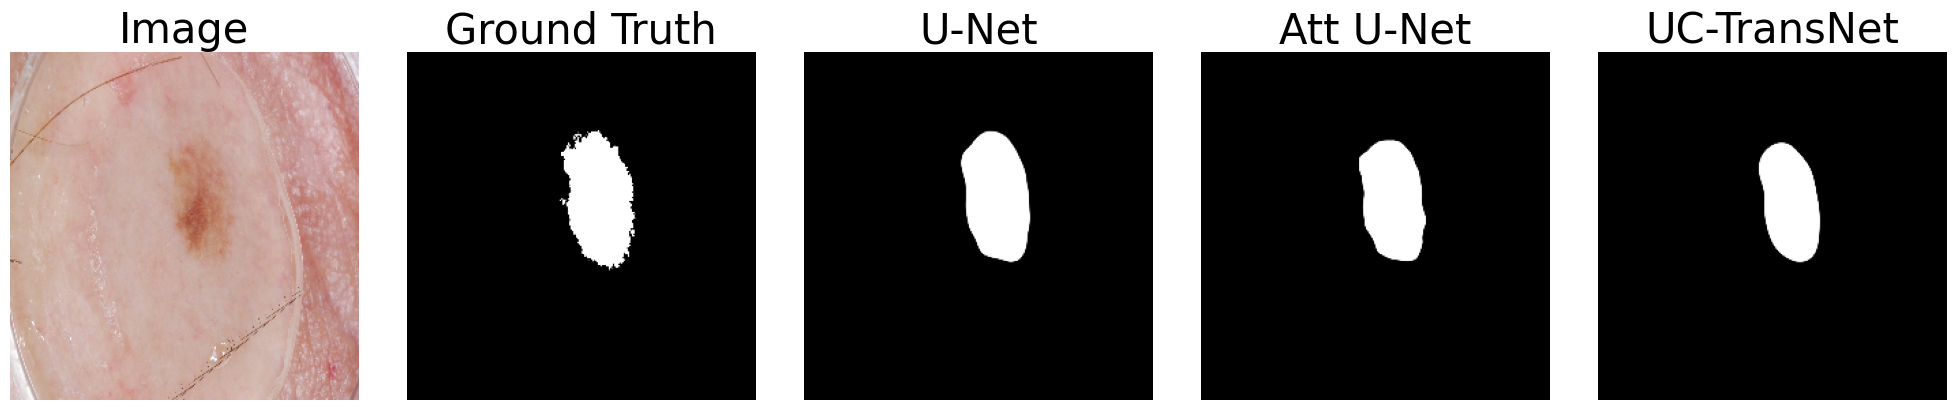

In [24]:
display_masks(skin_models, test_dataset_skin)

### Brain cancer dataset

In [13]:
brain_models = [("U-Net", unet_brain), ("Att U-Net", att_unet_brain), ("UC-TransNet", uctransnet_brain)]

In [26]:
evaluate(brain_models, test_dataset_brain)

Evaluating U-Net
77/77 [==============================] - 5s 54ms/step - loss: 0.2555 - dice_coefficient: 0.7629 - iou: 0.6270 - accuracy: 0.9920 - precision_metric: 0.8376 - recall_metric: 0.7124
Evaluating Att U-Net
77/77 [==============================] - 4s 39ms/step - loss: 0.2586 - dice_coefficient: 0.7590 - iou: 0.6228 - accuracy: 0.9919 - precision_metric: 0.8303 - recall_metric: 0.7158
Evaluating UC-TransNet
77/77 [==============================] - 4s 39ms/step - loss: 0.3330 - dice_coefficient: 0.6697 - iou: 0.5162 - accuracy: 0.9887 - precision_metric: 0.7025 - recall_metric: 0.6632


2025-02-16 09:44:18.931678: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


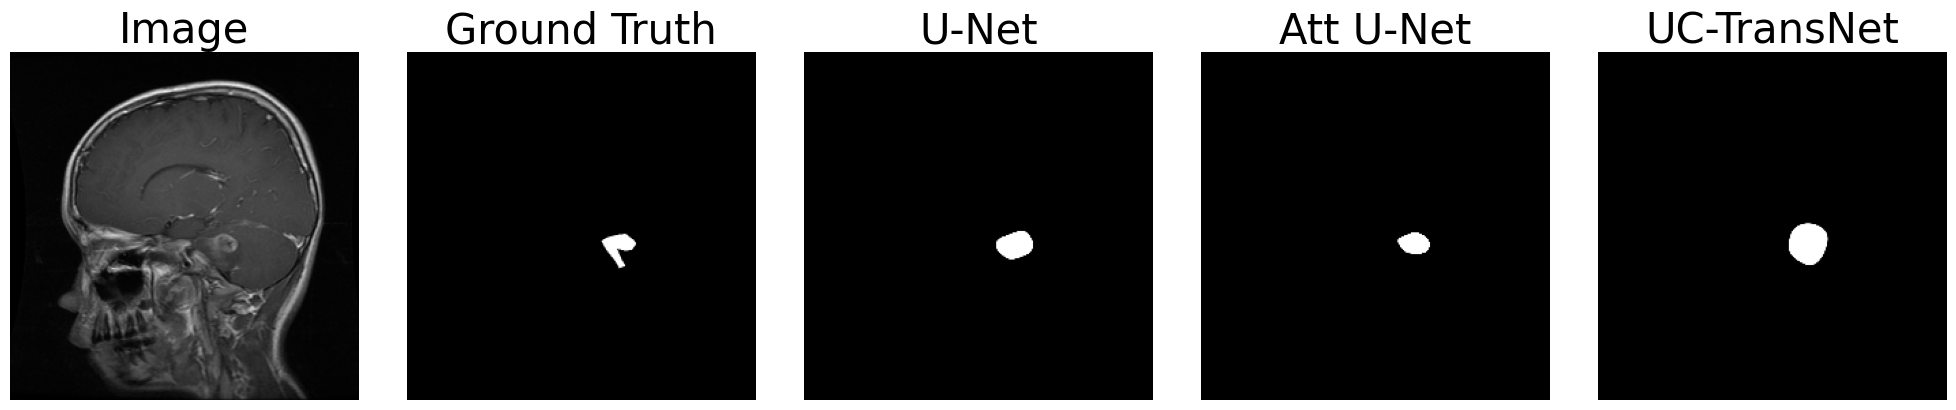

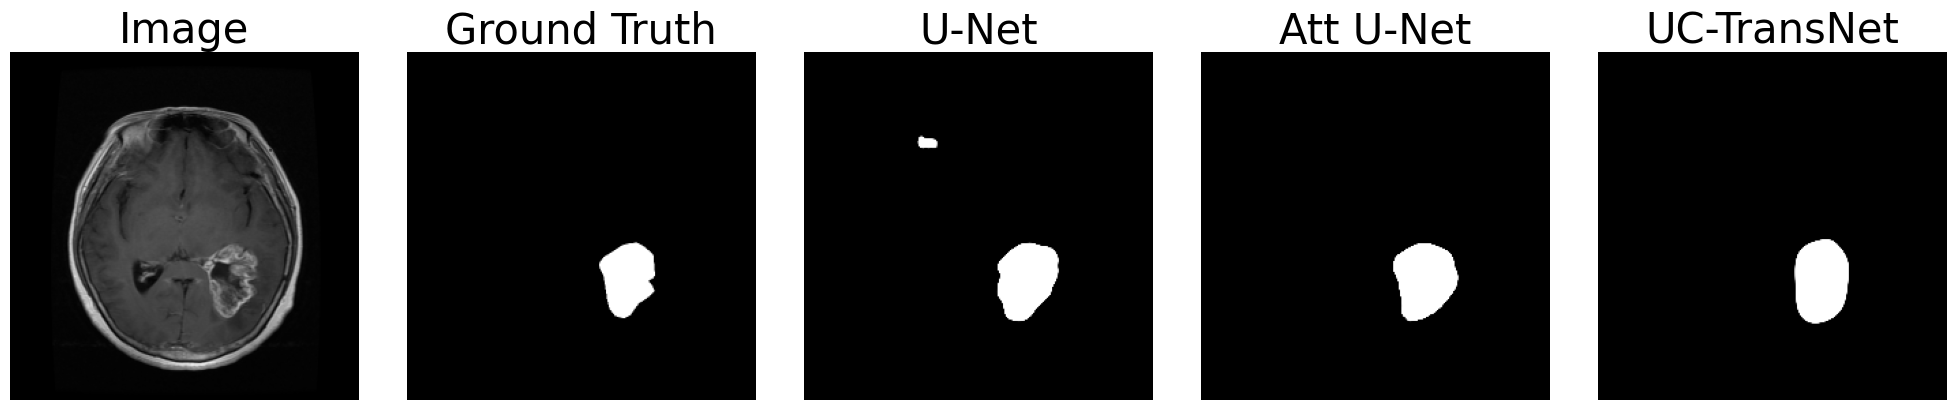

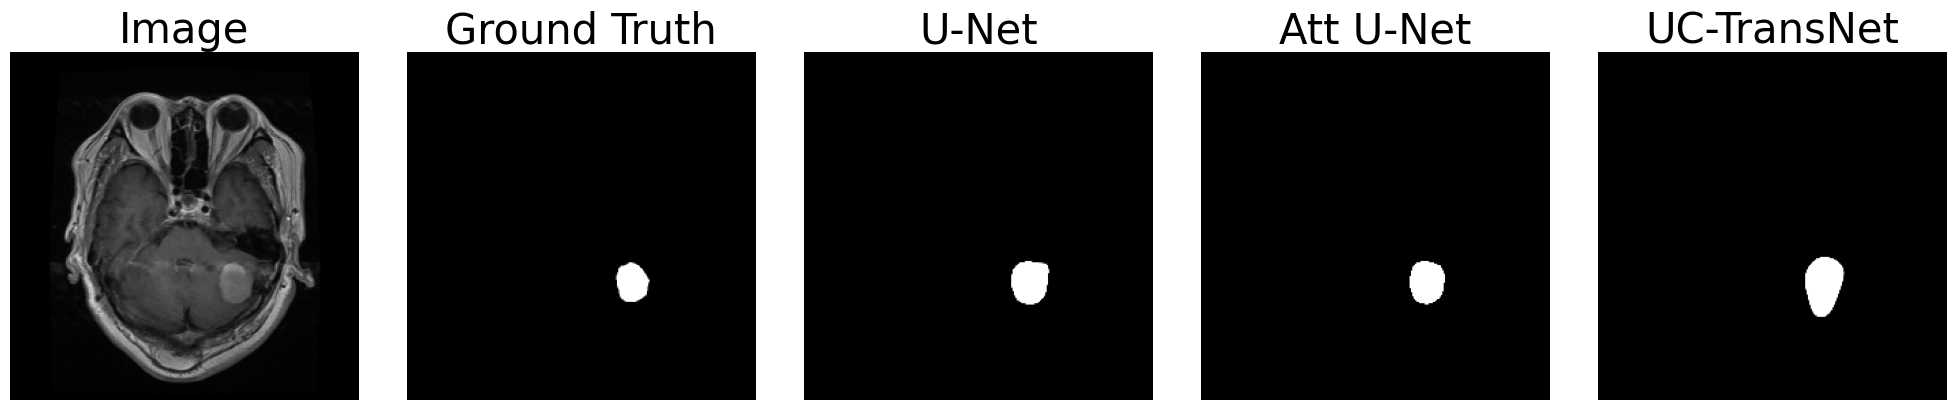

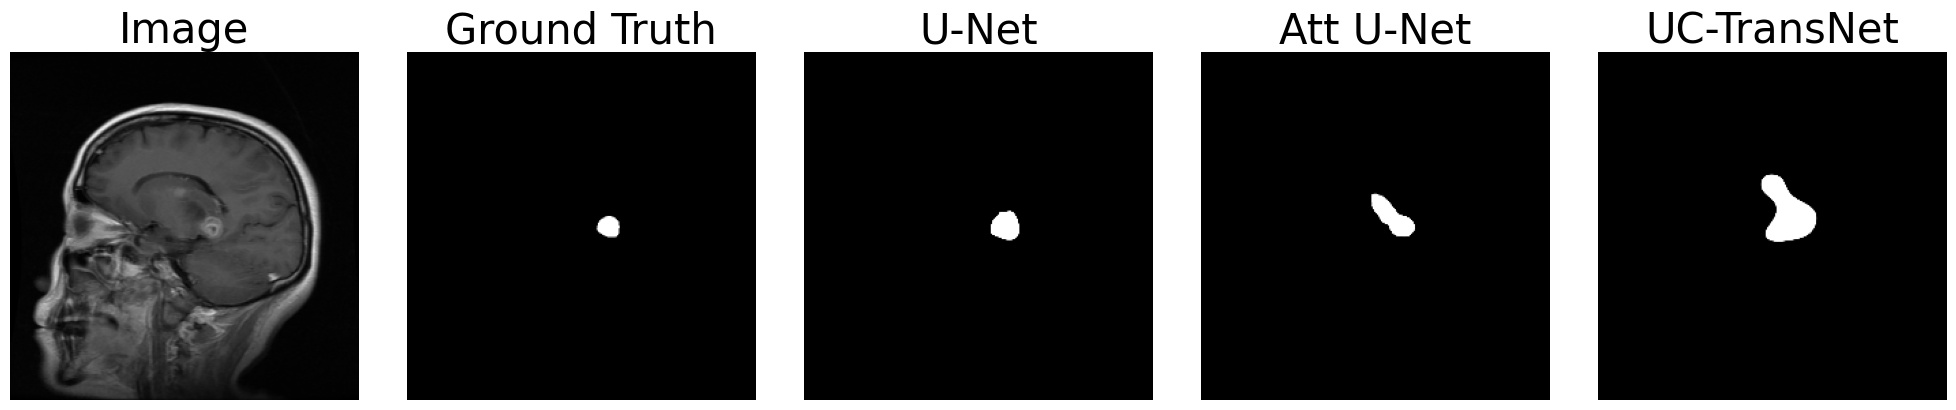

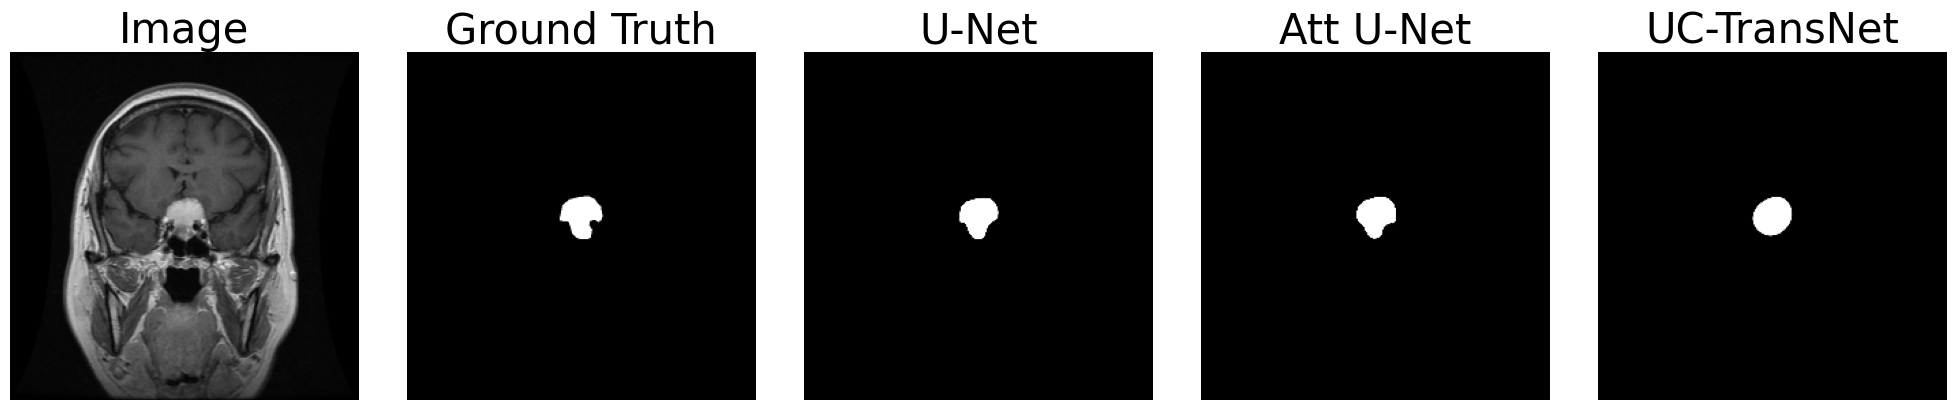

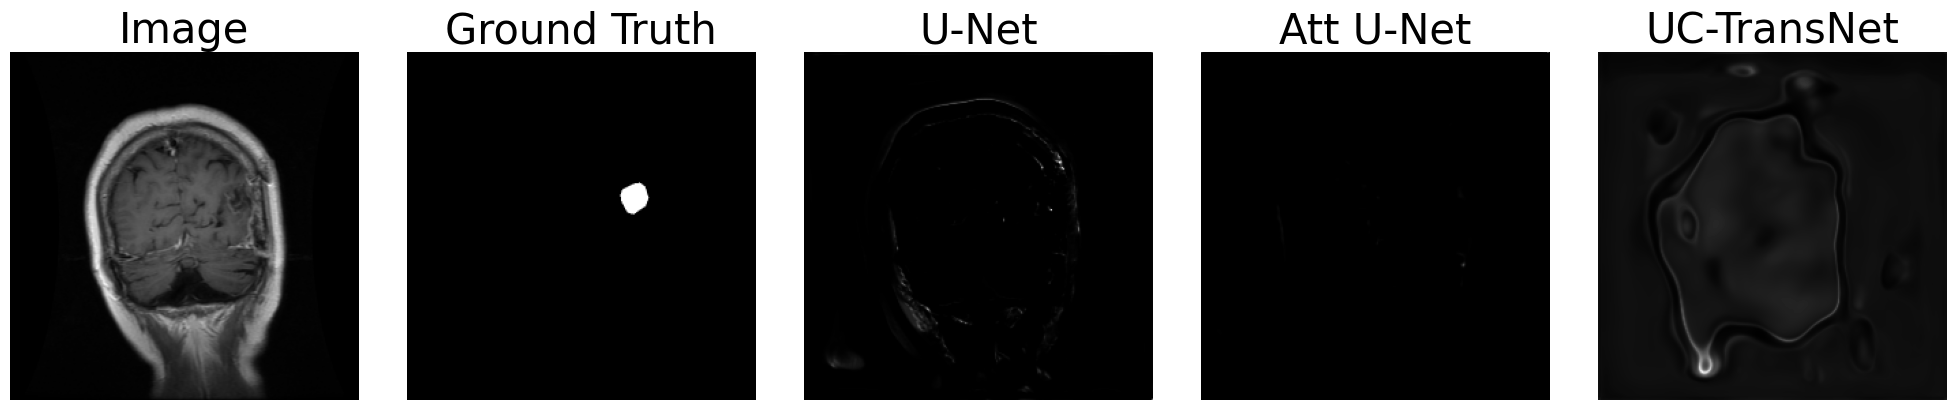

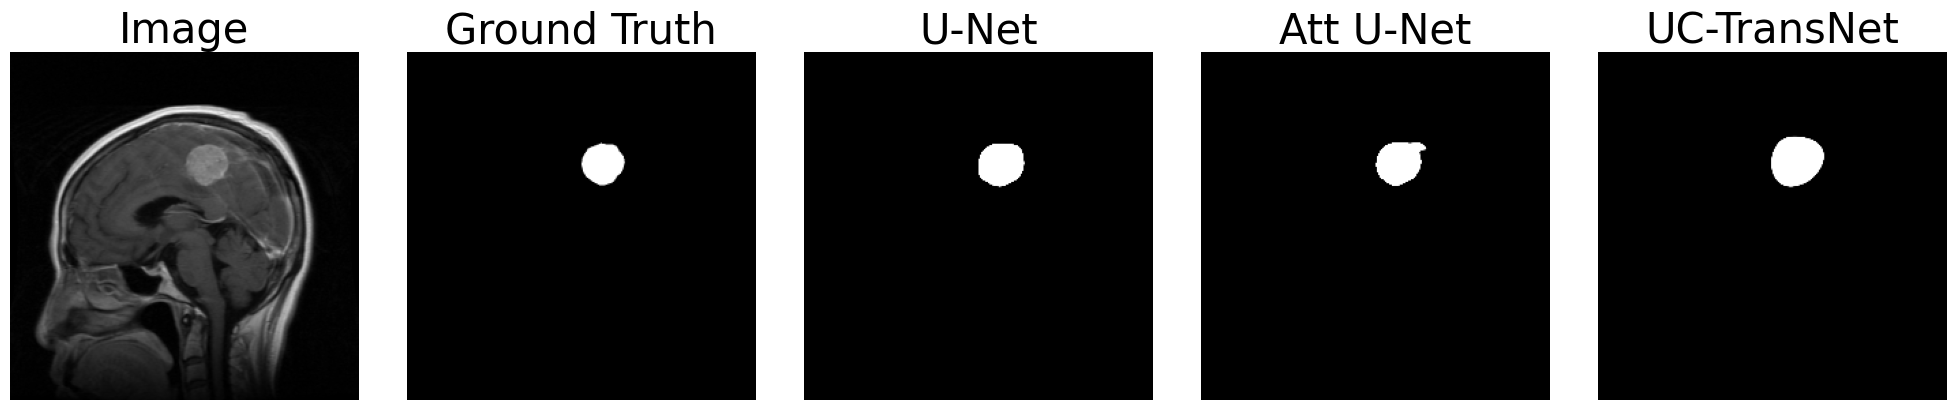

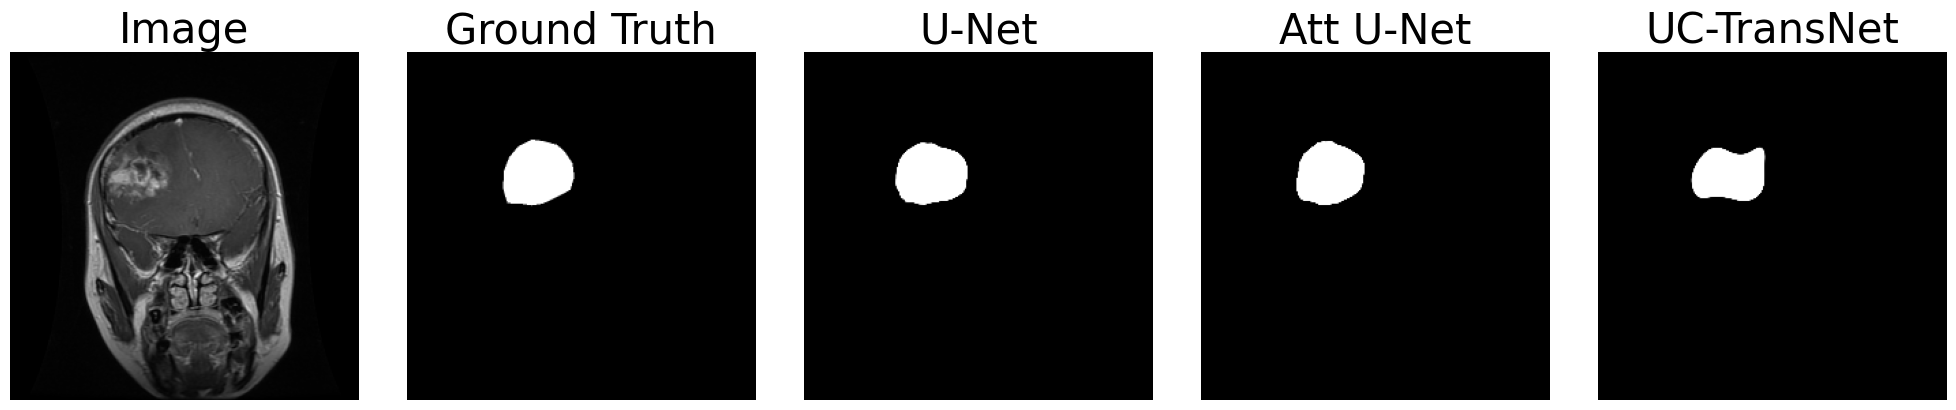

In [14]:
display_masks(brain_models, test_dataset_brain)